In [52]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv("cardio_train.csv" , sep=";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [54]:
df.shape

(70000, 13)

In [55]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [56]:
df = df.drop(columns=['id'])


In [57]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [58]:
df.duplicated().sum()

# Removing Duplicates
df = df.drop_duplicates()
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [59]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [60]:
df.describe()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69976 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69976 non-null  int64  
 1   gender       69976 non-null  int64  
 2   height       69976 non-null  int64  
 3   weight       69976 non-null  float64
 4   ap_hi        69976 non-null  int64  
 5   ap_lo        69976 non-null  int64  
 6   cholesterol  69976 non-null  int64  
 7   gluc         69976 non-null  int64  
 8   smoke        69976 non-null  int64  
 9   alco         69976 non-null  int64  
 10  active       69976 non-null  int64  
 11  cardio       69976 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [62]:
df["age"] = (df["age"]/365).astype(int)
df


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [63]:
df["height"] = pd.to_numeric(df["height"] , errors="coerce")
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [64]:
df["weight"] = pd.to_numeric(df["weight"] , errors="coerce")
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [65]:
print(df["cardio"].value_counts())
# normalize shows the proportion of both values
print(df["cardio"].value_counts(normalize=True))

cardio
0    35004
1    34972
Name: count, dtype: int64
cardio
0    0.500229
1    0.499771
Name: proportion, dtype: float64


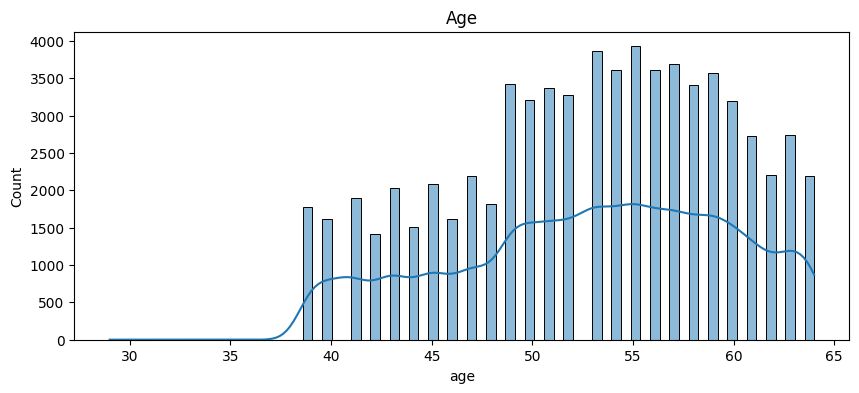

In [66]:
plt.figure(figsize=(10,4))
sb.histplot(df["age"] , kde=True)
plt.title("Age")
plt.show()

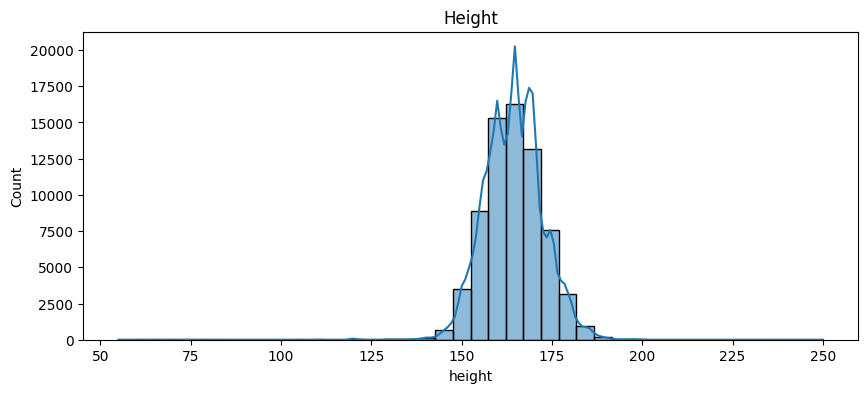

In [67]:
plt.figure(figsize=(10,4))
sb.histplot(df["height"] , bins=40 , kde=True)
plt.title("Height")
plt.show()

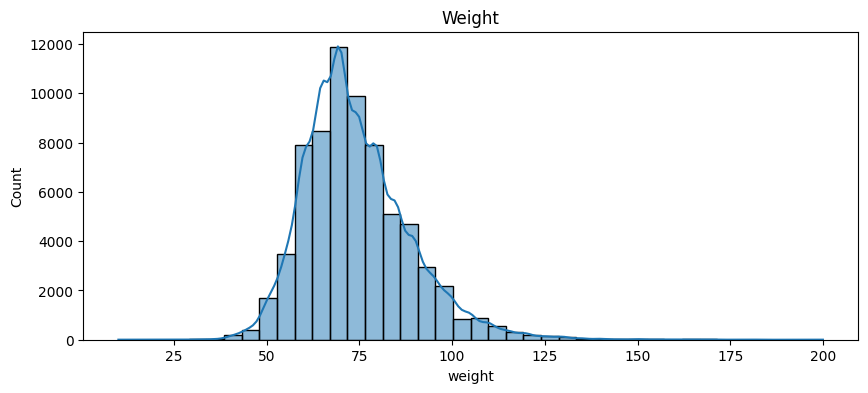

In [68]:
plt.figure(figsize=(10 , 4))
sb.histplot(df["weight"] , bins=40 , kde=True)
plt.title("Weight")
plt.show()

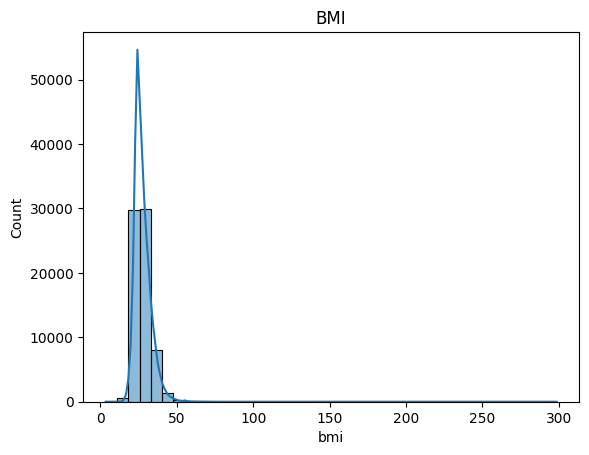

In [69]:
df["bmi"] = df["weight"] / ((df["height"]/100)**2)
sb.histplot(df["bmi"] , bins=40 , kde=True)
plt.title("BMI")
plt.show()

In [70]:
df["gender"].value_counts()

gender
1    45509
2    24467
Name: count, dtype: int64

In [71]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,61,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [72]:
df.dropna(subset=["bmi"] , inplace=True)

In [73]:
print(f"total values of cholesterol is : {df["cholesterol"].value_counts()}")
print(f"total values of glucoze is : {df["gluc"].value_counts()}")
print(f"smoke count is : {df["smoke"].value_counts()}")
print(f"alcohol count is : {df["alco"].value_counts()}")
print(f"active type is : {df["active"].value_counts()}")
print(f"total cardio count is : {df["cardio"].value_counts()}")

total values of cholesterol is : cholesterol
1    52361
2     9549
3     8066
Name: count, dtype: int64
total values of glucoze is : gluc
1    59455
3     5331
2     5190
Name: count, dtype: int64
smoke count is : smoke
0    63807
1     6169
Name: count, dtype: int64
alcohol count is : alco
0    66212
1     3764
Name: count, dtype: int64
active type is : active
1    56241
0    13735
Name: count, dtype: int64
total cardio count is : cardio
0    35004
1    34972
Name: count, dtype: int64


In [74]:
df.corr(numeric_only=True)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
age,1.000000,-0.022863,-0.081538,0.053576,0.020855,0.017619,0.154023,0.098391,-0.047664,-0.029767,-0.009994,0.238020,0.085431
gender,-0.022863,1.000000,0.499080,0.155320,0.005996,0.015241,-0.035915,-0.020558,0.338131,0.170950,0.005917,0.008037,-0.096636
height,-0.081538,0.499080,1.000000,0.290983,0.005488,0.006151,-0.050225,-0.018592,0.188003,0.094425,-0.006569,-0.010871,-0.290653
weight,0.053576,0.155320,0.290983,1.000000,0.030693,0.043695,0.141679,0.106790,0.067725,0.067071,-0.016863,0.181599,0.761986
ap_hi,0.020855,0.005996,0.005488,0.030693,1.000000,0.016084,0.023768,0.011833,-0.000928,0.001403,-0.000031,0.054475,0.024843
ap_lo,0.017619,0.015241,0.006151,0.043695,0.016084,1.000000,0.024004,0.010794,0.005177,0.010594,0.004784,0.065717,0.035331
cholesterol,0.154023,-0.035915,-0.050225,0.141679,0.023768,0.024004,1.000000,0.451539,0.010298,0.035718,0.009927,0.221119,0.146189
gluc,0.098391,-0.020558,-0.018592,0.106790,0.011833,0.010794,0.451539,1.000000,-0.004799,0.011214,-0.006761,0.089268,0.101327
smoke,-0.047664,0.338131,0.188003,0.067725,-0.000928,0.005177,0.010298,-0.004799,1.000000,0.340077,0.025870,-0.015533,-0.027273
alco,-0.029767,0.170950,0.094425,0.067071,0.001403,0.010594,0.035718,0.011214,0.340077,1.000000,0.025486,-0.007366,0.014352


In [75]:
df.cov(numeric_only=True)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
age,45.793685,-0.073779,-4.530744,5.219804,21.739503,22.475781,0.709103,0.381086,-0.091452,-0.045446,-0.026861,0.805358,3.522049
gender,-0.073779,0.227398,1.954207,1.066345,0.440443,1.370026,-0.011652,-0.005611,0.045717,0.018391,0.001121,0.001916,-0.280741
height,-4.530744,1.954207,67.424106,34.399608,6.941742,9.521336,-0.280577,-0.087378,0.437691,0.174922,-0.021423,-0.044634,-14.539762
weight,5.219804,1.066345,34.399608,207.279679,68.067998,118.586576,1.387731,0.879979,0.276455,0.217853,-0.096429,1.307271,66.834435
ap_hi,21.739503,0.440443,6.941742,68.067998,23727.622010,467.017706,2.490817,1.043232,-0.040548,0.048772,-0.001902,4.195657,23.313663
ap_lo,22.475781,1.370026,9.521336,118.586576,467.017706,35533.976888,3.078388,1.164544,0.276669,0.450534,0.358157,6.193993,40.574330
cholesterol,0.709103,-0.011652,-0.280577,1.387731,2.490817,3.078388,0.462853,0.175825,0.001986,0.005482,0.002682,0.075218,0.605914
gluc,0.381086,-0.005611,-0.087378,0.879979,1.043232,1.164544,0.175825,0.327588,-0.000779,0.001448,-0.001537,0.025547,0.353317
smoke,-0.091452,0.045717,0.437691,0.276455,-0.040548,0.276669,0.001986,-0.000779,0.080388,0.021753,0.002913,-0.002202,-0.047108
alco,-0.045446,0.018391,0.174922,0.217853,0.048772,0.450534,0.005482,0.001448,0.021753,0.050897,0.002284,-0.000831,0.019725


In [76]:
df.dropna(subset="height" , inplace=True)

In [77]:
df.dropna(subset="weight" , inplace=True)

In [78]:
df["height"].count()

np.int64(69976)

In [79]:
df["weight"].count()

np.int64(69976)

In [80]:
# 0 for female and 1 for male
df['gender'] = df['gender'].replace({1:0,2:1})

In [81]:
df['gender'].value_counts()

gender
0    45509
1    24467
Name: count, dtype: int64

In [82]:
# # ap_hi must be between 80 and 250 another are unrealistic data 
# df = df[(df['ap_hi'] >= 80) & (df['ap_hi'] <= 250)]
# # ap_lo must be between 40 and 150 another are unrealistic data
# df = df[(df['ap_lo'] >= 40) & (df['ap_lo'] <= 150)]

# df.shape

rules = {
    'ap_hi': (80, 250),
    'ap_lo': (40, 150),
    'height': (120, 220),
    'weight': (30, 200),
    'bmi': (10, 60)
}


In [83]:
# df = df[(df['height'] >= 120) & (df['height'] <= 220)]

# df = df[(df['weight'] >= 30) & (df['weight'] <= 200)]

invalid_count = np.zeros(len(df))

len(invalid_count)


69976

In [84]:
for col , (low , high) in rules.items():
    invalid_count += ~df[col].between(low, high)

In [85]:
invalid_count

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
69995    0.0
69996    0.0
69997    0.0
69998    0.0
69999    0.0
Name: ap_hi, Length: 69976, dtype: float64

In [86]:
for col, (low, high) in rules.items():
    median_val = df[col].median()
    
    df.loc[
        (~df[col].between(low, high)) & (invalid_count == 1),
        col
    ] = median_val


In [87]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,1,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,0,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,0,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,1,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,61,0,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,52,1,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,61,0,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [88]:
df = df[invalid_count < 2]


In [89]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,1,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,0,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,0,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,1,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,61,0,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,52,1,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,61,0,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [90]:
invalid_count

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
69995    0.0
69996    0.0
69997    0.0
69998    0.0
69999    0.0
Name: ap_hi, Length: 69976, dtype: float64

In [91]:

df = df[df['ap_hi'] > df['ap_lo']]

df.shape

(69823, 13)

In [92]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,1,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,0,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,0,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,1,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,61,0,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,52,1,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,61,0,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [93]:
corr_matrix = df.corr()
corr_matrix

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
age,1.000000,-0.022786,-0.085840,0.054195,0.206390,0.155187,0.154041,0.098265,-0.047344,-0.029605,-0.009957,0.237955,0.101408
gender,-0.022786,1.000000,0.516742,0.156686,0.062957,0.066563,-0.036175,-0.020768,0.338200,0.170778,0.005986,0.008084,-0.109938
height,-0.085840,0.516742,1.000000,0.306468,0.016045,0.035938,-0.054635,-0.021262,0.194617,0.096823,-0.007520,-0.012052,-0.204395
weight,0.054195,0.156686,0.306468,1.000000,0.272391,0.250037,0.142103,0.107222,0.067845,0.066686,-0.017065,0.181843,0.852901
ap_hi,0.206390,0.062957,0.016045,0.272391,1.000000,0.709056,0.196035,0.093884,0.028861,0.035081,0.000596,0.430784,0.269803
ap_lo,0.155187,0.066563,0.035938,0.250037,0.709056,1.000000,0.159229,0.073536,0.024719,0.037336,-0.000625,0.336692,0.237104
cholesterol,0.154041,-0.036175,-0.054635,0.142103,0.196035,0.159229,1.000000,0.451045,0.010313,0.035432,0.009659,0.220976,0.173598
gluc,0.098265,-0.020768,-0.021262,0.107222,0.093884,0.073536,0.451045,1.000000,-0.004998,0.010789,-0.007054,0.088898,0.120368
smoke,-0.047344,0.338200,0.194617,0.067845,0.028861,0.024719,0.010313,-0.004998,1.000000,0.340121,0.025658,-0.015546,-0.032728
alco,-0.029605,0.170778,0.096823,0.066686,0.035081,0.037336,0.035432,0.010789,0.340121,1.000000,0.025099,-0.007527,0.016601


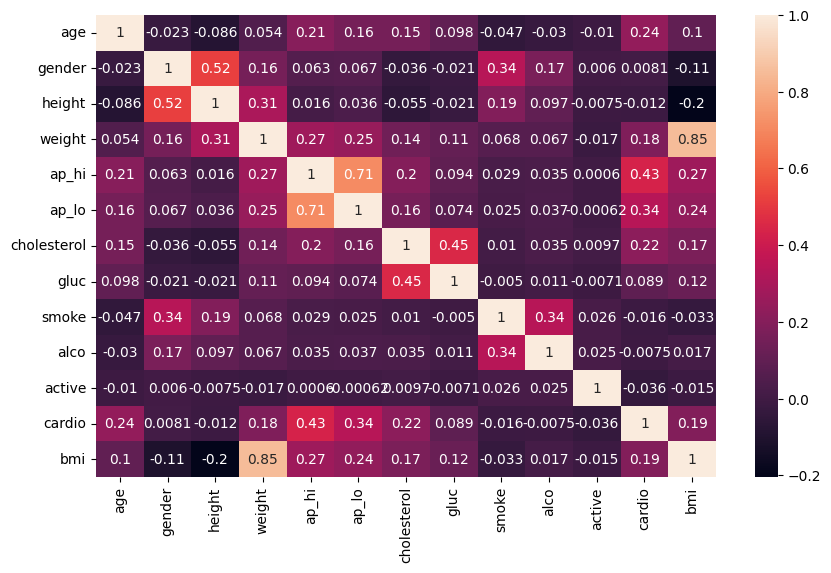

In [94]:
plt.figure(figsize=(10,6))
sb.heatmap(corr_matrix , annot=True)
plt.show()

In [95]:
# Pandas thinks that it is a tuple not a list
# df.groupby("gender")['ap_hi','ap_lo'].mean() 
df.groupby("gender")[['ap_hi','ap_lo']].mean() 

,ap_hi,ap_lo
gender,,
0,126.257723,80.826695
1,128.502172,82.133533


In [96]:
df.groupby('gender')["cardio"].sum()

gender
0    22558
1    12329
Name: cardio, dtype: int64

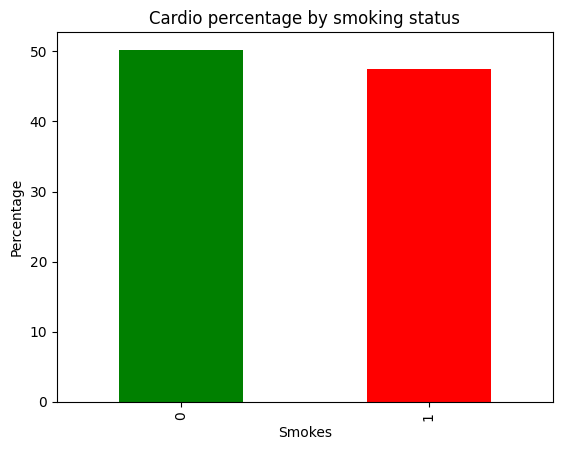

In [97]:
group = df.groupby('smoke')["cardio"].mean() * 100
group.plot(kind="bar" , color=["green" , "red"])
plt.title("Cardio percentage by smoking status")
plt.ylabel("Percentage")
plt.xlabel("Smokes")
plt.show()

In [98]:
import os

In [99]:
df_final = df
df_final.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,1,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,0,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,0,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [100]:
path = ""
df_final.to_csv(path + "cardio_processed.csv" , index=False)
print("dataset saved")

dataset saved


In [101]:
df['ap_hi'].describe()

count    69823.000000
mean       127.042250
std         16.999303
min         80.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        240.000000
Name: ap_hi, dtype: float64